<div style='font-size:100%;'>
    <a id='import'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center> Importing necessary libraries  </center>
    </h1>
 
</div> 

In [1]:
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import seaborn as sb


<div style='font-size:100%;'>
    <a id='clean'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center> Importing the dataset </center>
    </h1>
</div>

In [2]:
data = pd.read_csv('kidney.csv')

In [3]:
data.shape

(400, 26)

<div style='font-size:100%;'>
    <a id='discover'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center> Discovering the dataset </center>
    </h1>
</div> 

In [4]:
data.head(20)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48,80,1.020,1,0,?,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1.020,4,0,?,normal,notpresent,notpresent,...,38,6000,?,no,no,no,good,no,no,ckd
2,3,62,80,1.010,2,3,normal,normal,notpresent,notpresent,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,4,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51,80,1.010,2,0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,6,60,90,1.015,3,0,?,?,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,7,68,70,1.010,0,0,?,normal,notpresent,notpresent,...,36,?,?,no,no,no,good,no,no,ckd
7,8,24,?,1.015,2,4,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,9,52,100,1.015,3,0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,10,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      400 non-null    int64 
 1   age     400 non-null    object
 2   bp      400 non-null    object
 3   sg      400 non-null    object
 4   al      400 non-null    object
 5   su      400 non-null    object
 6   rbc     400 non-null    object
 7   pc      400 non-null    object
 8   pcc     400 non-null    object
 9   ba      400 non-null    object
 10  bgr     400 non-null    object
 11  bu      400 non-null    object
 12  sc      400 non-null    object
 13  sod     400 non-null    object
 14  pot     400 non-null    object
 15  hemo    400 non-null    object
 16  pcv     400 non-null    object
 17  wbcc    400 non-null    object
 18  rbcc    400 non-null    object
 19  htn     400 non-null    object
 20  dm      400 non-null    object
 21  cad     400 non-null    object
 22  appet   400 non-null    ob

In [6]:
data.dtypes

id        int64
age      object
bp       object
sg       object
al       object
su       object
rbc      object
pc       object
pcc      object
ba       object
bgr      object
bu       object
sc       object
sod      object
pot      object
hemo     object
pcv      object
wbcc     object
rbcc     object
htn      object
dm       object
cad      object
appet    object
pe       object
ane      object
class    object
dtype: object

In [7]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48,80,1.020,1,0,?,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1.020,4,0,?,normal,notpresent,notpresent,...,38,6000,?,no,no,no,good,no,no,ckd
2,3,62,80,1.010,2,3,normal,normal,notpresent,notpresent,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,4,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51,80,1.010,2,0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
data.isnull().sum()

id       0
age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [9]:
data.isin(['?']).sum()

id         0
age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [10]:
data.tail().T
#transpsoe the table for better visualization

,395,396,397,398,399
id,396,397,398,399,400
age,55,42,12,17,58
bp,80,70,80,60,80
sg,1.020,1.025,1.020,1.025,1.025
al,0,0,0,0,0
su,0,0,0,0,0
rbc,normal,normal,normal,normal,normal
pc,normal,normal,normal,normal,normal
pcc,notpresent,notpresent,notpresent,notpresent,notpresent
ba,notpresent,notpresent,notpresent,notpresent,notpresent


In [11]:
data['pcv'].unique()


array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', '?',
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '52', '14',
       '22', '18', '42', '17', '46', '23', '19', '25', '41', '26', '15',
       '21', '43', '20', '47', '9', '49', '50', '53', '51', '54'],
      dtype=object)

In [12]:


column=["age","bp","sg","al","su","bgr","bu", "sc", "sod","pot", "hemo", "pcv", "wbcc", "rbcc"]
for col in column:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [13]:
data.isnull().sum()


id         0
age        9
bp        12
sg        47
al        46
su        49
rbc        0
pc         0
pcc        0
ba         0
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        0
dm         0
cad        0
appet      0
pe         0
ane        0
class      0
dtype: int64

In [14]:
data = data.replace(['?'], np.nan) 

In [15]:
data.isin(['?']).sum()

id       0
age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [16]:
data.head(30)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,2,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,3,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,4,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
5,6,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd
6,7,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36.0,NaN,NaN,no,no,no,good,no,no,ckd
7,8,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44.0,6900.0,5.0,no,yes,no,good,yes,no,ckd
8,9,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33.0,9600.0,4.0,yes,yes,no,good,no,yes,ckd
9,10,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd


In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,200.500000,115.614301,1.000,100.75,200.50,300.25,400.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


In [18]:
data.describe(exclude=[np.number]).T


,count,unique,top,freq
rbc,248,2,normal,201
pc,335,2,normal,259
pcc,396,2,notpresent,354
ba,396,2,notpresent,374
htn,398,2,no,251
dm,398,2,no,261
cad,398,2,no,364
appet,399,2,good,317
pe,399,2,no,323
ane,399,2,no,339


In [19]:
data.describe(exclude=[np.number])


,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
count,248,335,396,396,398,398,398,399,399,399,400
unique,2,2,2,2,2,2,2,2,2,2,2
top,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
freq,201,259,354,374,251,261,364,317,323,339,250


In [20]:
data['pcv'].unique()

array([44., 38., 31., 32., 35., 39., 36., 33., 29., 28., nan, 16., 24.,
       37., 30., 34., 40., 45., 27., 48., 52., 14., 22., 18., 42., 17.,
       46., 23., 19., 25., 41., 26., 15., 21., 43., 20., 47.,  9., 49.,
       50., 53., 51., 54.])

In [21]:
data['pc'].unique()

array(['normal', 'abnormal', nan], dtype=object)

In [22]:
data['rbcc'].unique()

array([5.2, nan, 3.9, 4.6, 4.4, 5. , 4. , 3.7, 3.8, 3.4, 2.6, 2.8, 4.3,
       3.2, 3.6, 4.1, 4.9, 2.5, 4.2, 4.5, 3.1, 4.7, 3.5, 6. , 2.1, 5.6,
       2.3, 2.9, 2.7, 8. , 3.3, 3. , 2.4, 4.8, 5.4, 6.1, 6.2, 6.3, 5.1,
       5.8, 5.5, 5.3, 6.4, 5.7, 5.9, 6.5])

In [23]:
data['wbcc'].unique()

array([ 7800.,  6000.,  7500.,  6700.,  7300.,    nan,  6900.,  9600.,
       12100.,  4500., 12200., 11000.,  3800., 11400.,  5300.,  9200.,
        6200.,  8300.,  8400., 10300.,  9800.,  9100.,  7900.,  6400.,
        8600., 18900., 21600.,  4300.,  8500., 11300.,  7200.,  7700.,
       14600.,  6300.,  7100., 11800.,  9400.,  5500.,  5800., 13200.,
       12500.,  5600.,  7000., 11900., 10400., 10700., 12700.,  6800.,
        6500., 13600., 10200.,  9000., 14900.,  8200., 15200.,  5000.,
       16300., 12400., 10500.,  4200.,  4700., 10900.,  8100.,  9500.,
        2200., 12800., 11200., 19100., 12300., 16700.,  2600., 26400.,
        8800.,  7400.,  4900.,  8000., 12000., 15700.,  4100.,  5700.,
       11500.,  5400., 10800.,  9900.,  5200.,  5900.,  9300.,  9700.,
        5100.,  6600.])

In [24]:
data['rbcc'] = data['rbcc'].astype(float)
data['wbcc'] = data['wbcc'].astype(float)
data['pcv'] = data['pcv'].astype(float)

In [25]:
data['dm'].unique()

array(['yes', 'no', nan], dtype=object)

In [26]:
data['cad'].unique()

array(['no', 'yes', nan], dtype=object)

In [27]:
data['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [28]:
data['bp'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Name: bp, Length: 400, dtype: bool

In [102]:
import matplotlib.pyplot as plt

In [192]:
import missingno as msng

# VISUALISATION POUR BLOOD PRESSURE et hypertension


<AxesSubplot:xlabel='bp', ylabel='count'>

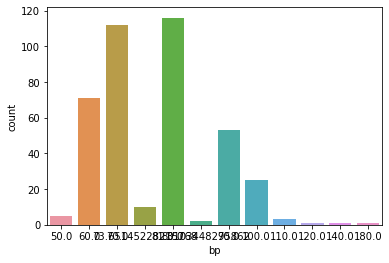

In [105]:
sns.countplot(x='bp', data=data)

<AxesSubplot:ylabel='bp'>

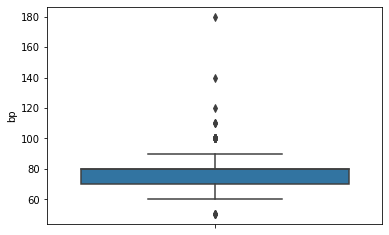

In [106]:
sns.boxplot(y='bp', data= data)

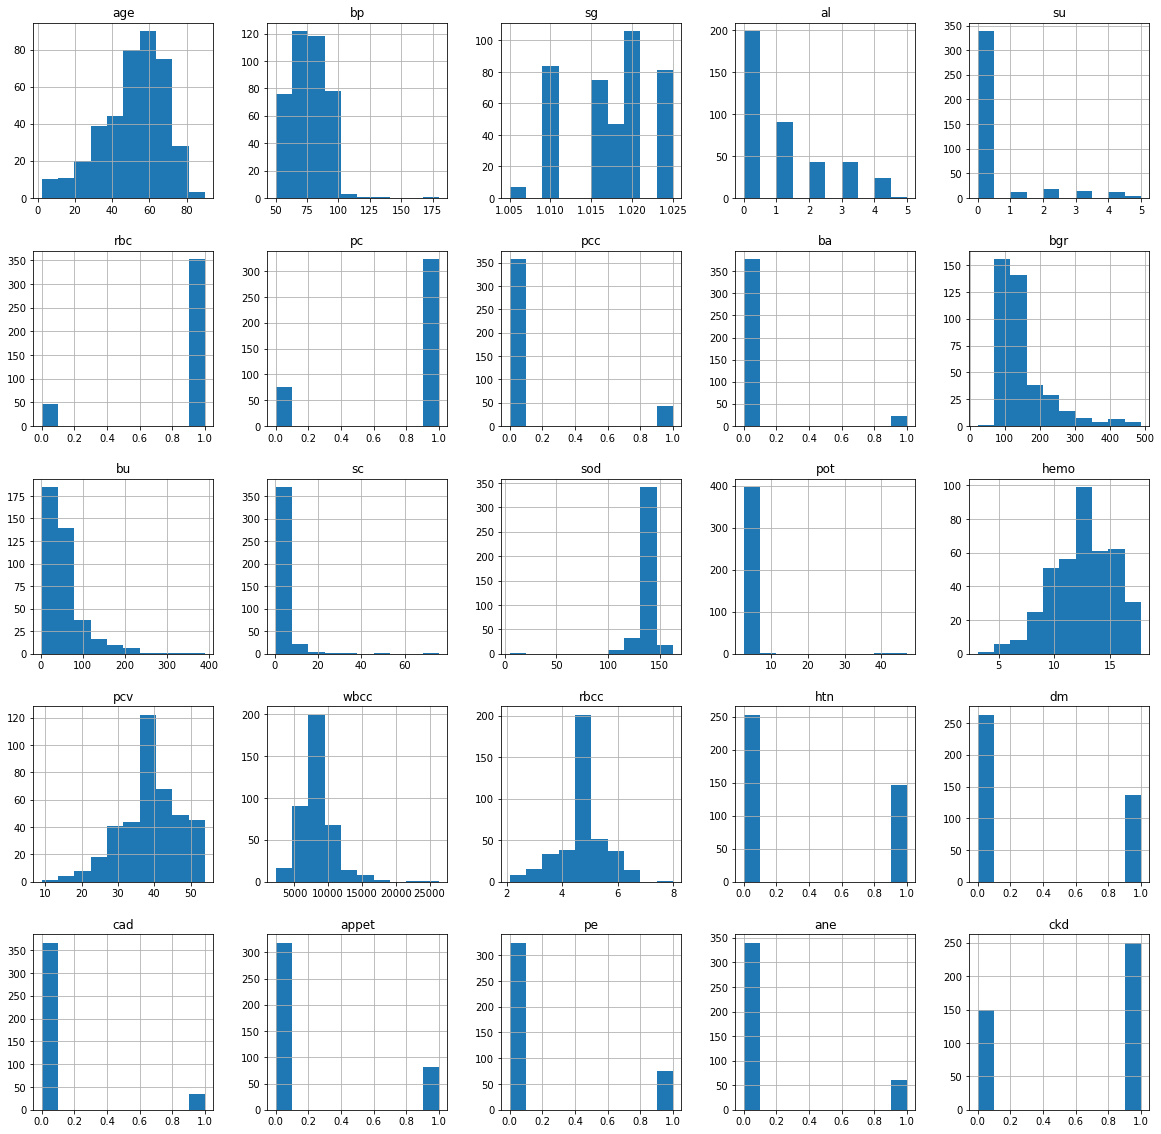

In [107]:
data.hist(figsize=(20,20))
plt.show()

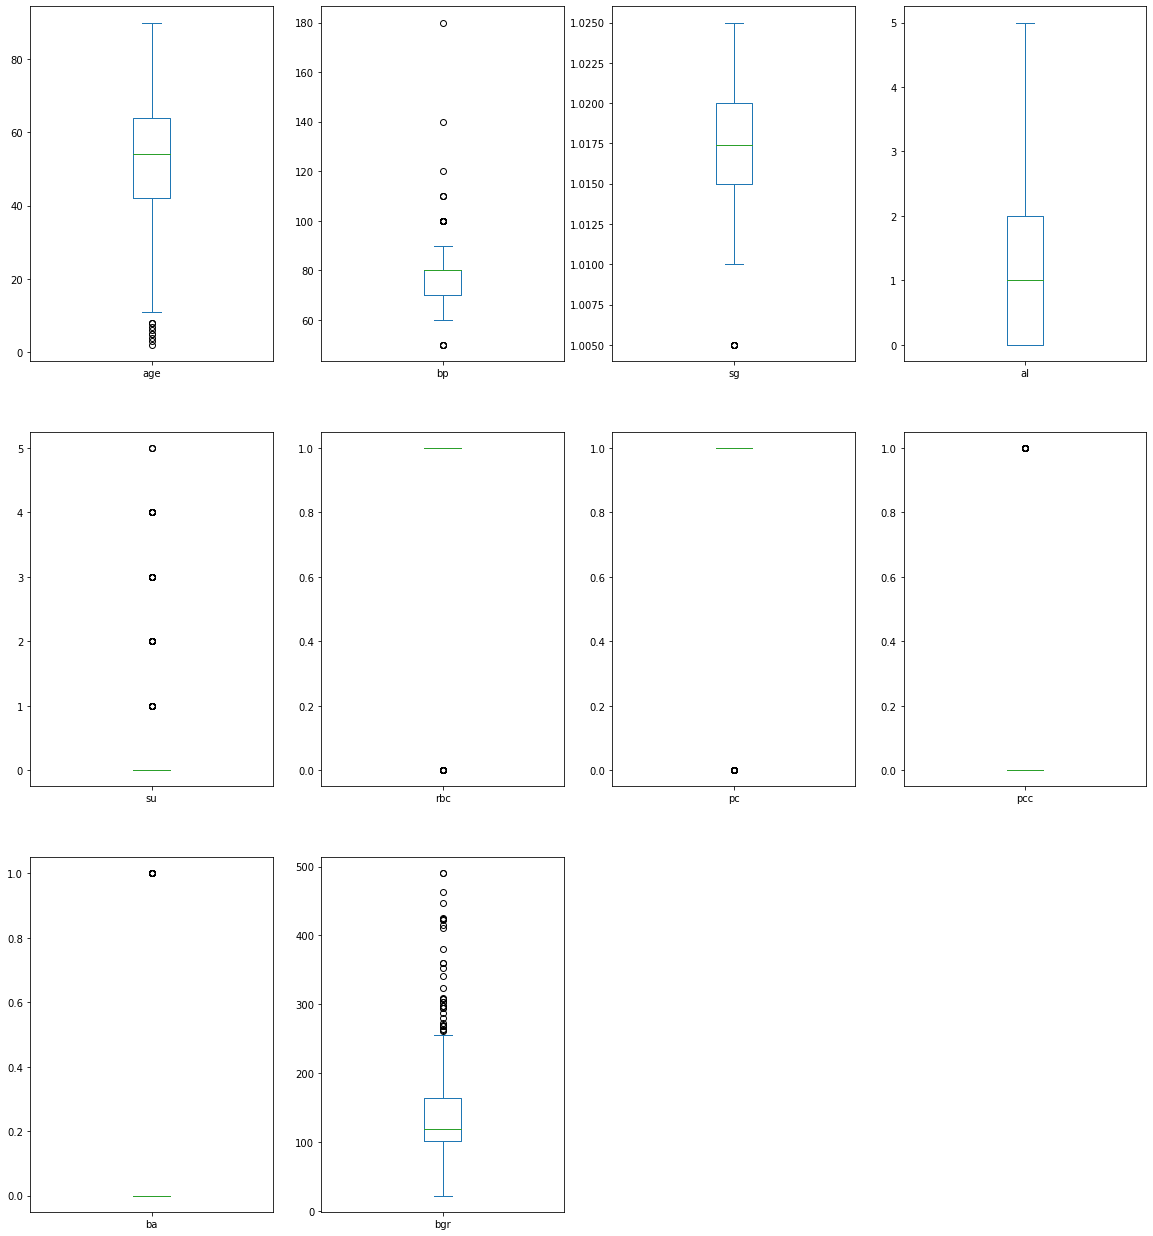

In [108]:
boxplot_cols=data.columns[:10]
data[boxplot_cols].plot(kind='box',subplots=True , layout=(4,4),figsize=(20,30))
plt.show()

C:\Users\moham_yyc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bp'>

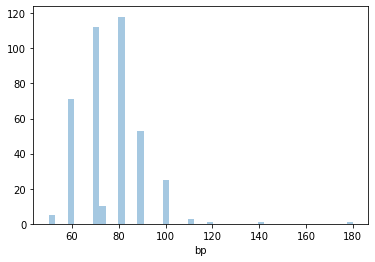

In [110]:
sns.distplot(data['bp'],kde=False)


<AxesSubplot:xlabel='htn', ylabel='count'>

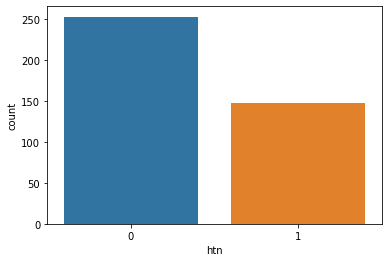

In [111]:
sns.countplot(x='htn', data=data)

<AxesSubplot:xlabel='bp', ylabel='htn'>

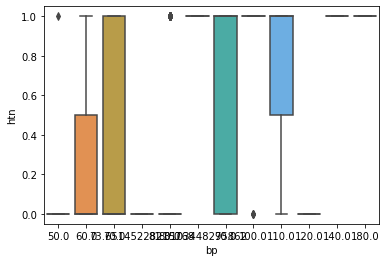

In [116]:
sns.boxplot(x='bp',y='htn',data=data)


<AxesSubplot:xlabel='htn'>

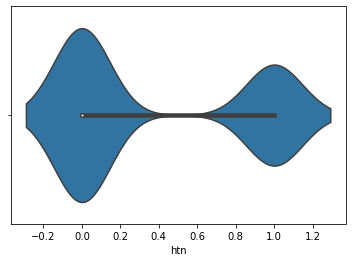

In [120]:
sns.violinplot(x='htn',data=data)
#Il est utilisé pour représenter la distribution de fréquence d'une variable continue en superposant un graphique de densité
#sur un diagramme en boîte. Vous pouvez tracer des violin plots à l'aide de la bibliothèque Seaborn

C:\Users\moham_yyc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='htn'>

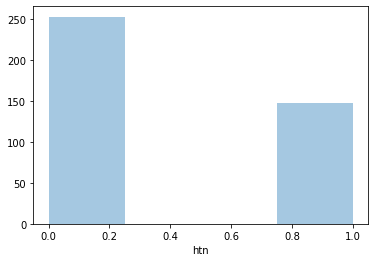

In [139]:
sns.distplot(data['htn'],kde=False)


C:\Users\moham_yyc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bp'>

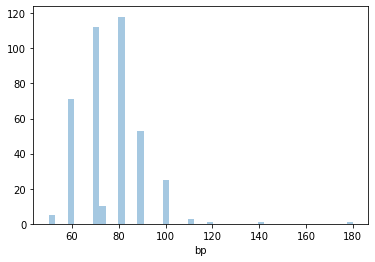

In [150]:
sns.distplot(data['bp'],kde=False)


## imputing missing values of hypertension and blood pressure

In [29]:
data['bp'].isnull().sum()

12

In [30]:
bp_null = data['bp'].isna()
data[['age','bp','htn','cad']].loc[bp_null]


,age,bp,htn,cad
7,24.0,NaN,no,no
75,5.0,NaN,no,no
132,50.0,NaN,yes,no
138,73.0,NaN,no,no
161,62.0,NaN,yes,no
164,14.0,NaN,no,no
185,4.0,NaN,no,no
187,3.0,NaN,no,no
188,8.0,NaN,no,no
215,2.0,NaN,no,no


In [31]:
data[['bp','htn']].groupby(['htn'], as_index = False).mean()

,htn,bp
0,no,73.651452
1,yes,81.310345


In [32]:
no_hypertension = (data['htn']== 'no')
yes_hypertension = (data['htn']== 'yes')
data.bp.loc[(bp_null & no_hypertension)] = data.bp.loc[(bp_null & no_hypertension)].fillna(data.bp.loc[no_hypertension].mean())
data.bp.loc[(bp_null & yes_hypertension)] = data.bp.loc[(bp_null & yes_hypertension)].fillna(data.bp.loc[yes_hypertension].mean())

C:\Users\moham_yyc\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [33]:
data[['bp','htn']].groupby(['htn'], as_index = False).mean()

,htn,bp
0,no,73.651452
1,yes,81.310345


In [34]:
htn_null= data['htn'].isna()
data[['bp','htn']].loc[htn_null]

,bp,htn
288,70.0,NaN
297,60.0,NaN


In [35]:
 data['htn']= data['htn'].fillna("no")

In [36]:
data['bp'].isnull().sum()

0

In [37]:
data[['bp','htn']].groupby(['htn'], as_index = False).mean()

,htn,bp
0,no,73.583061
1,yes,81.310345


In [38]:
data.isnull().sum()

id         0
age        9
bp         0
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        0
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

# visulatation sur dm et bgr

<AxesSubplot:xlabel='dm', ylabel='count'>

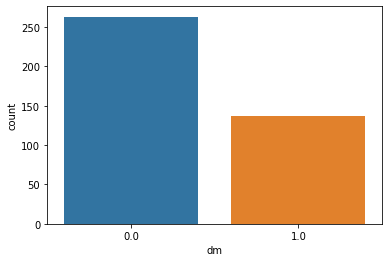

In [140]:
sns.countplot(x='dm', data=data)

<AxesSubplot:xlabel='bgr', ylabel='count'>

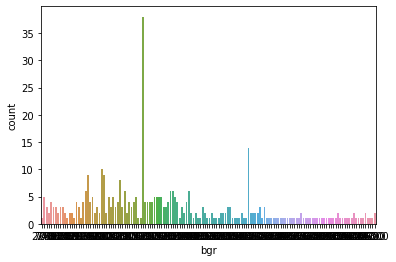

In [142]:
sns.countplot(x='bgr', data=data)

<AxesSubplot:ylabel='bgr'>

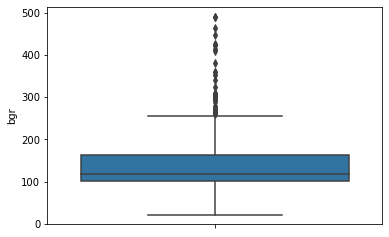

In [143]:
sns.boxplot(y='bgr', data= data)

<AxesSubplot:ylabel='dm'>

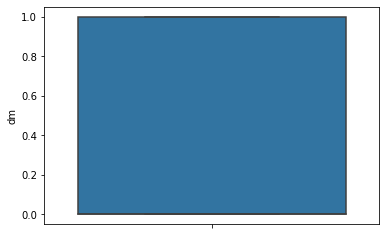

In [144]:
sns.boxplot(y='dm', data= data)

<AxesSubplot:xlabel='dm', ylabel='bgr'>

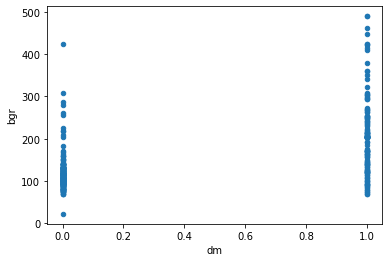

In [145]:
data.plot.scatter(x="dm", y="bgr")

<AxesSubplot:xlabel='bgr'>

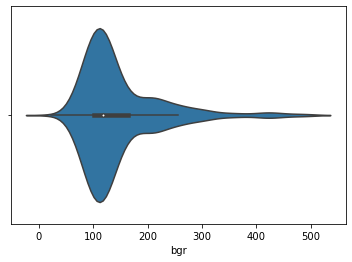

In [147]:
sns.violinplot(x='bgr',data=data)


<AxesSubplot:xlabel='dm'>

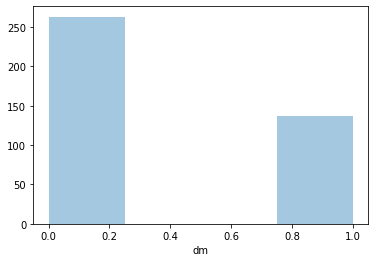

In [151]:
sns.distplot(data['dm'],kde=False)


<AxesSubplot:xlabel='bgr'>

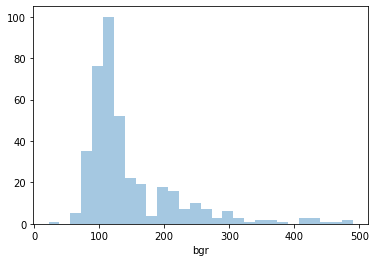

In [152]:
sns.distplot(data['bgr'],kde=False)


<AxesSubplot:xlabel='dm', ylabel='bgr'>

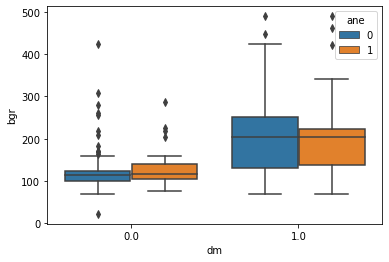

In [154]:
sns.boxplot(x='dm',y='bgr',hue='ane',data=data)


## imputing missing values of dm and bgr

In [39]:
dm_null = data['dm'].isnull()
bgr_null = data['bgr'].isnull()

In [40]:
data[['bgr','dm']].groupby(['dm']).median()


,bgr
dm,
no,109.0
yes,192.0


In [41]:
data[['bgr','dm']].groupby(['dm']).mean()


,bgr
dm,
no,117.524017
yes,204.816000


In [42]:
ps = data['dm'].isnull().sum()
ps

2

In [43]:
dm_null = data['dm'].isnull()
data[['bgr','dm']].loc[dm_null]

,bgr,dm
288,70.0,NaN
297,116.0,NaN


In [44]:
data.loc[dm_null]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
288,289,56.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,50.0,11000.0,5.1,no,NaN,NaN,good,no,no,notckd
297,298,53.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,45.0,7700.0,5.2,no,NaN,NaN,good,no,no,notckd


we have here two patients with a blood glucose less than 140 mg/dL and overall healthy profile.
patients don't have any symptom of diabetes so i'm going to replace the missing values in the 'diabetes' column with 'no'."

In [45]:
data['dm'] = data['dm'].fillna('no')

## imputing missing values of bgr 

In [46]:
data[['su','bgr','dm']].loc[bgr_null].sort_values('dm')


,su,bgr,dm
1,0.0,NaN,no
332,0.0,NaN,no
123,3.0,NaN,no
131,0.0,NaN,no
139,0.0,NaN,no
141,0.0,NaN,no
186,0.0,NaN,no
187,0.0,NaN,no
209,0.0,NaN,no
215,0.0,NaN,no


In [47]:
data[['bgr','dm']].loc[bgr_null].groupby(['dm']).size()


dm
no     32
yes    12
dtype: int64

In [48]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,2,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,3,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,4,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [49]:
data['dm'] = data['dm'].map({'yes':'1', 'no':'0'})

In [50]:
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,1,no,good,no,no,ckd
1,2,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,0,no,good,no,no,ckd
2,3,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,1,no,poor,no,yes,ckd
3,4,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,0,no,poor,yes,yes,ckd
4,5,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,0,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47.0,6700.0,4.9,no,0,no,good,no,no,notckd
396,397,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54.0,7800.0,6.2,no,0,no,good,no,no,notckd
397,398,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49.0,6600.0,5.4,no,0,no,good,no,no,notckd
398,399,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51.0,7200.0,5.9,no,0,no,good,no,no,notckd


In [51]:
data['dm'] = data['dm'].astype(float)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      400 non-null    int64  
 1   age     391 non-null    float64
 2   bp      400 non-null    float64
 3   sg      353 non-null    float64
 4   al      354 non-null    float64
 5   su      351 non-null    float64
 6   rbc     248 non-null    object 
 7   pc      335 non-null    object 
 8   pcc     396 non-null    object 
 9   ba      396 non-null    object 
 10  bgr     356 non-null    float64
 11  bu      381 non-null    float64
 12  sc      383 non-null    float64
 13  sod     313 non-null    float64
 14  pot     312 non-null    float64
 15  hemo    348 non-null    float64
 16  pcv     329 non-null    float64
 17  wbcc    294 non-null    float64
 18  rbcc    269 non-null    float64
 19  htn     400 non-null    object 
 20  dm      400 non-null    float64
 21  cad     398 non-null    object 
 22  ap

In [53]:
data['bgr'].corr(data['dm'])

0.527567753094733


Observations:

diabetes and blood glucose are moderately correlated with a coefficient of 0,53.
we have 50 missing values in the 'blood glucose random' column , 29 of them don't have diabetes .

interpretation:

as established earlier diabetes and blood glucose can be good predictors for each other . I think it's reasonable to replace the missing values of healthy people ( diabetes = 0 ) with the mean blood glucose of healthy people and do the same with people who got diabetes .


In [54]:
data['dm'].isnull().sum()

0

In [55]:
data[['bgr','dm']].groupby(['dm'], as_index = False).mean()

,dm,bgr
0,0.0,117.311688
1,1.0,204.816000


117 is the mean bgr of poeple who dont have diabete

204 is the mean bgr of poeple who  have diabete

In [56]:
data['bgr'].loc[(bgr_null & (data.dm == 0))] = data['bgr'].loc[(bgr_null & (data.dm == 0))].fillna(117)
data['bgr'].loc[(bgr_null & (data.dm == 1))] = data['bgr'].loc[(bgr_null & (data.dm == 1))].fillna(204)
data['bgr'].isnull().sum()

C:\Users\moham_yyc\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0

# visualit sur urine sugar

<AxesSubplot:xlabel='su', ylabel='Density'>

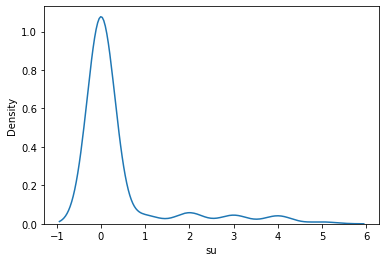

In [159]:
import seaborn as sns   
sns.kdeplot('su',data=data)


<AxesSubplot:xlabel='su', ylabel='count'>

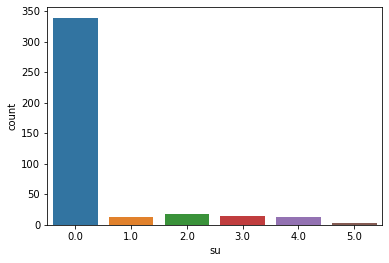

In [160]:
sns.countplot(x='su', data=data)

<AxesSubplot:xlabel='su'>

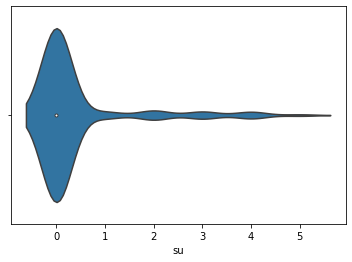

In [162]:
sns.violinplot(x='su',data=data)


## imputing missing values of urine Sugar

In [57]:
data['su'].isnull().sum()

49

In [58]:
data[['su','bgr','dm']].loc[data['su'].isnull()]

,su,bgr,dm
13,NaN,98.0,1.0
17,NaN,114.0,0.0
21,NaN,204.0,1.0
30,NaN,93.0,1.0
37,NaN,137.0,1.0
50,NaN,91.0,1.0
57,NaN,93.0,1.0
59,NaN,204.0,1.0
78,NaN,158.0,0.0
81,NaN,360.0,1.0


In [59]:
data['su'].describe()

count    351.000000
mean       0.450142
std        1.099191
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
Name: su, dtype: float64

Observation :

we can see that at least 75% of our patients have 0 urine sugar , and that they can be from diffrent categories.
Interpretaion :

all missing values in ur_sugar column should be set to 0

In [60]:
data['su'] = data['su'].fillna(0)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      400 non-null    int64  
 1   age     391 non-null    float64
 2   bp      400 non-null    float64
 3   sg      353 non-null    float64
 4   al      354 non-null    float64
 5   su      400 non-null    float64
 6   rbc     248 non-null    object 
 7   pc      335 non-null    object 
 8   pcc     396 non-null    object 
 9   ba      396 non-null    object 
 10  bgr     400 non-null    float64
 11  bu      381 non-null    float64
 12  sc      383 non-null    float64
 13  sod     313 non-null    float64
 14  pot     312 non-null    float64
 15  hemo    348 non-null    float64
 16  pcv     329 non-null    float64
 17  wbcc    294 non-null    float64
 18  rbcc    269 non-null    float64
 19  htn     400 non-null    object 
 20  dm      400 non-null    float64
 21  cad     398 non-null    object 
 22  ap

# visu pour autre colonne

<AxesSubplot:xlabel='ba', ylabel='count'>

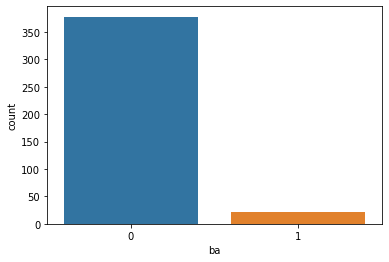

In [181]:
sns.countplot(x='ba', data=data)


<AxesSubplot:xlabel='appet', ylabel='count'>

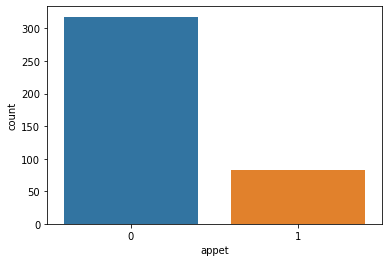

In [184]:
sns.countplot(x='appet', data=data)

<AxesSubplot:xlabel='ane', ylabel='Count'>

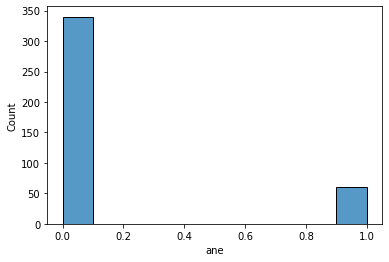

In [204]:
sns.histplot(data=data, x="ane")


<AxesSubplot:xlabel='pc', ylabel='pcc'>

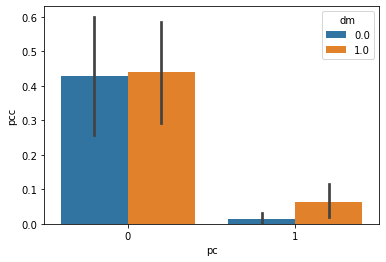

In [212]:
sns.barplot(x="pc", y="pcc", hue="dm", data=data)


<AxesSubplot:xlabel='pc', ylabel='Density'>

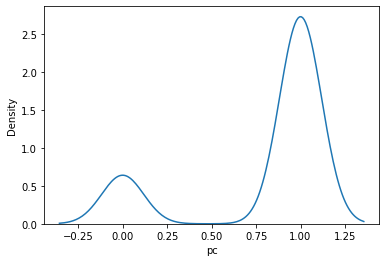

In [213]:
sns.kdeplot(data=data, x="pc")


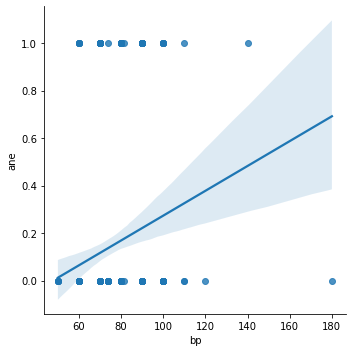

In [214]:
sns.lmplot(x="bp", y="ane", data=data)


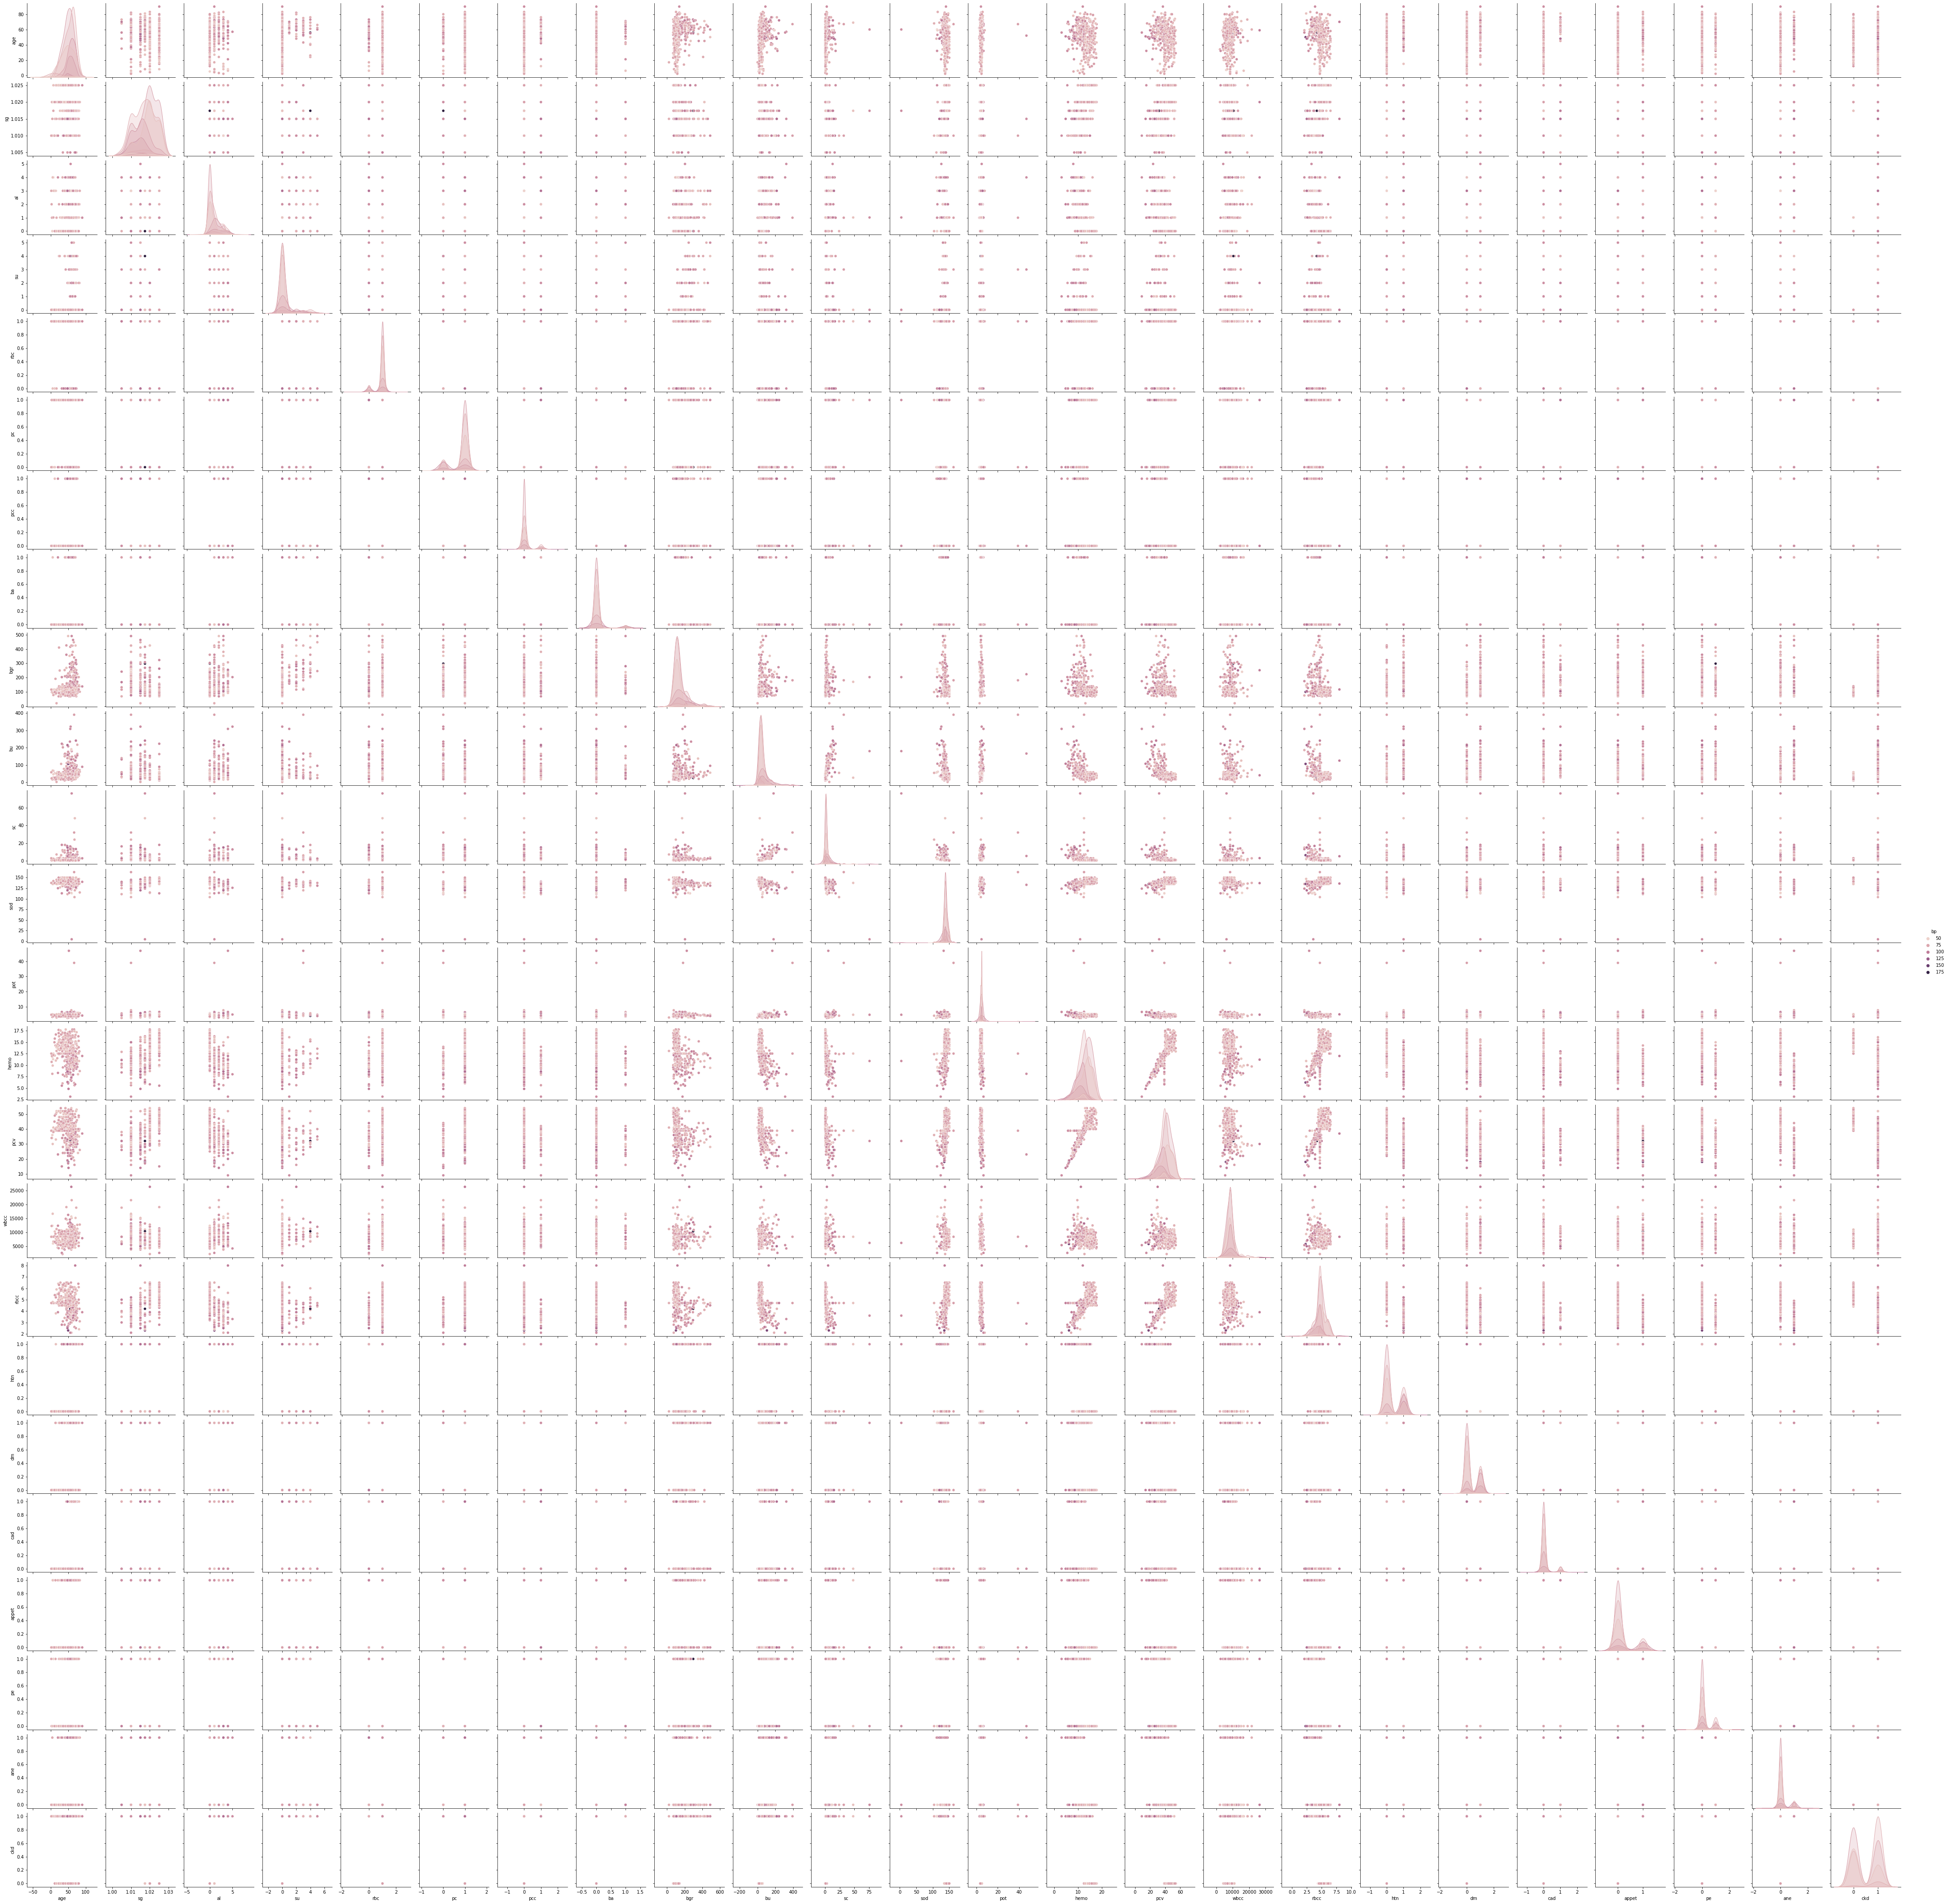

In [216]:
sns.pairplot(data, hue="bp")


## imputing missing values of others collumns

In [62]:
for col in data.columns:
    if data[col].dtype == 'float64' :
        data[col].fillna(data[col].mean(), inplace = True)
    else :
        data[col].fillna(data[col].mode()[0], inplace = True) 

In [63]:
categorical_cols =['rbc', 'pc', 'pcc', 'ba', 'htn', 'cad', 'appet', 'pe', 'ane']
categorical_cols

['rbc', 'pc', 'pcc', 'ba', 'htn', 'cad', 'appet', 'pe', 'ane']

In [64]:
dummy_class = pd.get_dummies(data['class'])
data.drop(['class'] , axis = 1 , inplace = True)
data = data.join(dummy_class)
data.drop(['notckd'],axis=1,inplace = True)
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,ckd
0,1,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7800.0,5.200000,yes,1.0,no,good,no,no,1
1,2,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38.0,6000.0,4.707435,no,0.0,no,good,no,no,1
2,3,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,4.707435,no,1.0,no,poor,no,yes,1
3,4,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.900000,yes,0.0,no,poor,yes,yes,1
4,5,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.600000,no,0.0,no,good,no,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47.0,6700.0,4.900000,no,0.0,no,good,no,no,0
396,397,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54.0,7800.0,6.200000,no,0.0,no,good,no,no,0
397,398,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49.0,6600.0,5.400000,no,0.0,no,good,no,no,0
398,399,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51.0,7200.0,5.900000,no,0.0,no,good,no,no,0


## LabelEncoder

In [65]:
# import LabelEncoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))
data[categorical_cols].head(10)      

,rbc,pc,pcc,ba,htn,cad,appet,pe,ane
0,1,1,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,0
2,1,1,0,0,0,0,1,0,1
3,1,0,1,0,1,0,1,1,1
4,1,1,0,0,0,0,0,0,0
5,1,1,0,0,1,0,0,1,0
6,1,1,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,1,0
8,1,0,1,0,1,0,0,0,1
9,0,0,1,0,1,0,1,0,1


## Correlation

In [66]:
data = data.drop(['id'], axis=1)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    float64
 4   su      400 non-null    float64
 5   rbc     400 non-null    int32  
 6   pc      400 non-null    int32  
 7   pcc     400 non-null    int32  
 8   ba      400 non-null    int32  
 9   bgr     400 non-null    float64
 10  bu      400 non-null    float64
 11  sc      400 non-null    float64
 12  sod     400 non-null    float64
 13  pot     400 non-null    float64
 14  hemo    400 non-null    float64
 15  pcv     400 non-null    float64
 16  wbcc    400 non-null    float64
 17  rbcc    400 non-null    float64
 18  htn     400 non-null    int32  
 19  dm      400 non-null    float64
 20  cad     400 non-null    int32  
 21  appet   400 non-null    int32  
 22  pe

<AxesSubplot:>

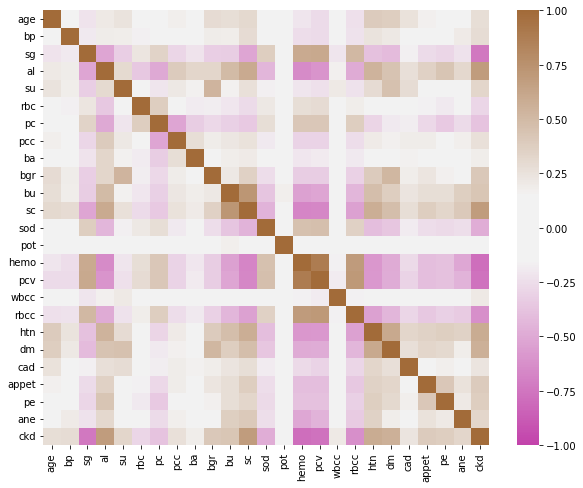

In [68]:
import seaborn as sns 

plt.figure(figsize = (10, 8))
cmap = sns.diverging_palette(320, 40, sep=40, as_cmap=True)
sns.heatmap(data.corr(method = "spearman"), vmin=-1, vmax= 1, cmap=cmap)

In [69]:
corr_df = data.corr(method = "spearman")
corr_ckd_df = pd.DataFrame(corr_df.ckd)
corr_ckd_df.rename(columns = { 'ckd' : 'ckd_corr'}, inplace = True)
corr_ckd_df.sort_values('ckd_corr')

,ckd_corr
hemo,-0.782853
pcv,-0.771262
sg,-0.734833
rbcc,-0.630710
sod,-0.480184
pc,-0.375154
rbc,-0.282642
pot,0.032579
ba,0.186871
wbcc,0.208264


## variables with strong negative relationship with ckd :

ur_specific_gravity : corr.coef = -0.748
Hemoglobin : corr.coef = -0.780
packed cell volume : corr.coef = -0.762

## variables with strong positive relationship with ckd :

serum creatinine : corr.coef = 0.716
ur_albumin: corr.coef = 0.727

## variables with moderate positive relationship with ckd :

anemia
blood urea
blood glucose random
pedal edema
abnormal_ur_pus_cell
poor appetite
abnormal_red_blood_cells
diabetes
hypertension

## variables with moderate negative relationship with ckd :

red blood cell count
sodium

##  with weak positive relationship with ckd :

potassium
ur_bacteria_present
age
coronary artery disease
white blood cell count
ur_pus_cell_clumps_present
Dias_blood_pressure
ur_sugar


## => we chose to eliminate the weakest variables :
potassium ,ur_bacteria_present, coronary artery disease,white blood cell count,ur_pus_cell_clumps_present,Dias_blood_pressure ,ur_sugar	

In [70]:
from sklearn.model_selection import train_test_split

df1 = data.drop(['ckd','pot','ba','cad','wbcc','pcc','bp','su'] , axis =1)
ind_col = [col for col in df1.columns if col != "ckd"]
dep_col = "ckd"
X = data[ind_col]
y = data[dep_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(300, 17)
(100, 17)


<div style='font-size:85%;'>
    <a id='discover'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center>classification without normalisation</center>
    </h1>
</div> 

In [71]:
from sklearn import svm, tree, naive_bayes, ensemble , neighbors

#Common Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

#Import SelectKBest for Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression


In [72]:
MLA = [
    #logistic regression
    LogisticRegression() ,
    #random forest
    ensemble.RandomForestClassifier(random_state=0),
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    #Trees    
    tree.DecisionTreeClassifier(random_state=0),
    tree.ExtraTreeClassifier(random_state=0),
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    #SVM
    svm.LinearSVC(random_state=0), 
    svm.NuSVC(probability=True),
    svm.SVC(probability=True) 
    ]# this list all fct of machine learning 

In [73]:
ind_col = [col for col in data.columns if col != "ckd"]
X = ind_col
Y ="ckd"
x = data[ind_col]
a=data[ind_col]
y =data["ckd"]
scaler = MinMaxScaler()
x=scaler.fit_transform(x)
y.shape
x.shape   

(400, 24)

In [74]:
X_train, X_test, y_train, y_test=model_selection.train_test_split(data[X], data[Y], test_size = 0.25, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(300, 24)
(100, 24)


In [75]:
MLA_columns = ['MLA Name', 'MLA Test Accuracy' ]
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    alg.fit(X_train, y_train)

    alg_acc = accuracy_score(y_test, alg.predict(X_test))
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = alg_acc

   
    
    row_index+=1

    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)
MLA_compare

C:\Users\moham_yyc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\moham_yyc\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


,MLA Name,MLA Test Accuracy
1,RandomForestClassifier,1.0
4,DecisionTreeClassifier,0.99
3,GaussianNB,0.97
5,ExtraTreeClassifier,0.96
0,LogisticRegression,0.94
2,BernoulliNB,0.93
8,NuSVC,0.79
7,LinearSVC,0.75
6,KNeighborsClassifier,0.71
9,SVC,0.62


<div style='font-size:85%;'>
    <a id='discover'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center>classification with normalisation</center>
    </h1>
</div> 

# classification with normalisation

In [76]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [77]:
MLA_columns = ['MLA Name', 'MLA Test Accuracy']
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    alg.fit(X_train, y_train)

    alg_acc = accuracy_score(y_test, alg.predict(X_test))
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = alg_acc

   
    
    row_index+=1
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Test Accuracy
0,LogisticRegression,1.0
9,SVC,1.0
6,KNeighborsClassifier,0.99
7,LinearSVC,0.99
8,NuSVC,0.98
5,ExtraTreeClassifier,0.96
4,DecisionTreeClassifier,0.95
1,RandomForestClassifier,0.93
2,BernoulliNB,0.93
3,GaussianNB,0.72


## over-sampling

In [78]:
Xb=data[ind_col]
Yb=data["ckd"]# you have or not exp 75% ckd and 25% no ckd so we need to put it 50% : over sampling 50% when we have 25%ckd

In [79]:
conda install -c conda-forge imbalanced-learn


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\moham_yyc\anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.14.0               |   py39hcbf5309_0         1.0 MB  conda-forge
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.1 MB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.7.0-py_1
  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.12.0-py39haa95532_0 --> conda-forge::conda-4.14.0-py39hcbf5309_0




==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda




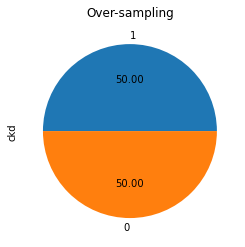

In [80]:
from imblearn.over_sampling import RandomOverSampler

rus = RandomOverSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(Xb, Yb)

ax = y_res.value_counts().plot.pie(autopct='%.2f')

_ = ax.set_title("Over-sampling")
     

In [81]:
y_res.value_counts()

1    250
0    250
Name: ckd, dtype: int64

In [82]:
scaler = MinMaxScaler()
X_res=scaler.fit_transform(X_res)

In [83]:
X_train, X_test, y_train, y_test=model_selection.train_test_split(X_res, y_res, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(375, 24)
(125, 24)


In [84]:
MLA_columns = ['MLA Name', 'MLA Test Accuracy' ]
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    alg.fit(X_train, y_train)

    alg_acc = accuracy_score(y_test, alg.predict(X_test))
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = alg_acc

   
    
    row_index+=1

    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Test Accuracy
1,RandomForestClassifier,1.0
9,SVC,1.0
4,DecisionTreeClassifier,0.984
5,ExtraTreeClassifier,0.984
7,LinearSVC,0.984
0,LogisticRegression,0.976
3,GaussianNB,0.968
6,KNeighborsClassifier,0.968
8,NuSVC,0.944
2,BernoulliNB,0.936
